In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_csv('/content/car_price_data.csv')

In [179]:
df.shape

(724, 6)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     724 non-null    object
 1   year        724 non-null    int64 
 2   Price       724 non-null    int64 
 3   kms_driven  724 non-null    int64 
 4   fuel_type   724 non-null    object
 5   model       724 non-null    object
dtypes: int64(3), object(3)
memory usage: 34.1+ KB


In [181]:
df

,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Santro Xing
1,Mahindra,2006,425000,40,Diesel,Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Grand i10
3,Ford,2014,575000,36000,Diesel,EcoSport Titanium
4,Ford,2012,175000,41000,Diesel,Figo
...,...,...,...,...,...,...
719,Maruti,2011,270000,50000,Petrol,Suzuki Ritz
720,Tata,2009,110000,30000,Diesel,Indica V2
721,Toyota,2009,300000,132000,Petrol,Corolla Altis
722,Tata,2018,260000,27000,Diesel,Zest XM


# Exploratory Data Analysis (EDA)

In [182]:
df.head()

,company,year,Price,kms_driven,fuel_type,model
0,Hyundai,2007,80000,45000,Petrol,Santro Xing
1,Mahindra,2006,425000,40,Diesel,Jeep CL550
2,Hyundai,2014,325000,28000,Petrol,Grand i10
3,Ford,2014,575000,36000,Diesel,EcoSport Titanium
4,Ford,2012,175000,41000,Diesel,Figo


In [183]:
df.describe()

,year,Price,kms_driven
count,724.000000,7.240000e+02,724.000000
mean,2012.321823,4.032451e+05,46791.342541
std,4.122940,4.802936e+05,34575.416435
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,8.500003e+06,400000.000000


In [184]:
df.describe(include = 'object')

,company,fuel_type,model
count,724,724,724
unique,25,3,254
top,Maruti,Petrol,Suzuki Swift
freq,202,390,46


## year

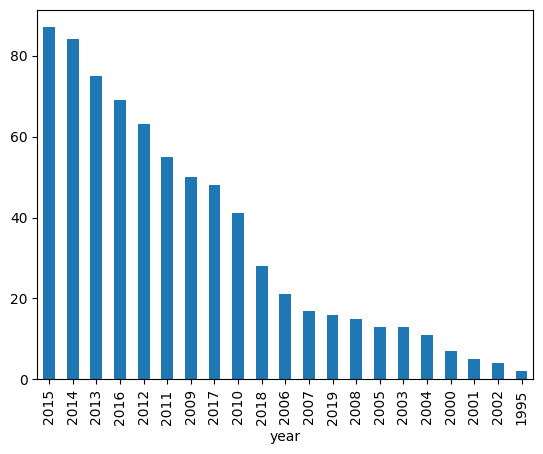

In [185]:
df['year'].value_counts().plot(kind = 'bar')
plt.show()

## company

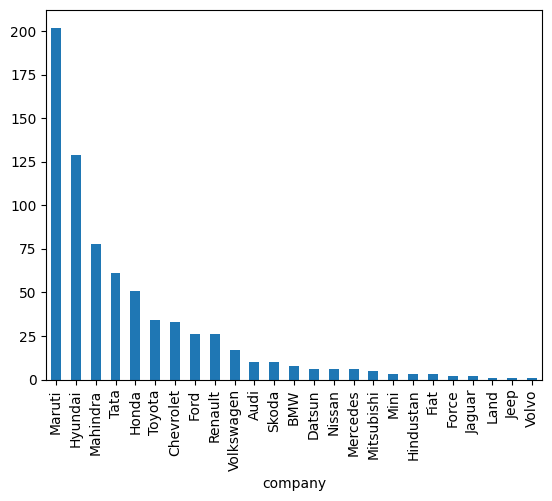

In [186]:
df['company'].value_counts().plot(kind = 'bar')
plt.show()

## fuel_type

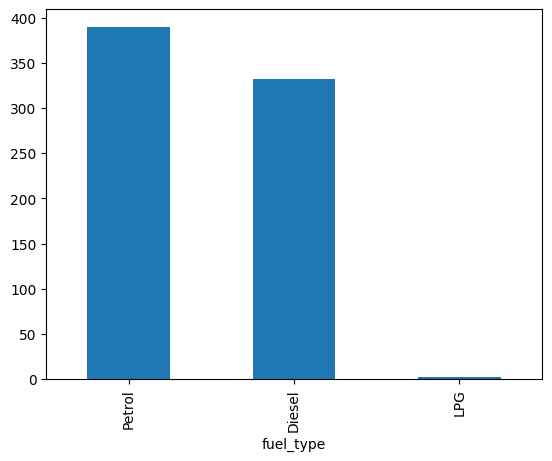

In [187]:
df['fuel_type'].value_counts().plot(kind = 'bar')
plt.show()

## kms_driven

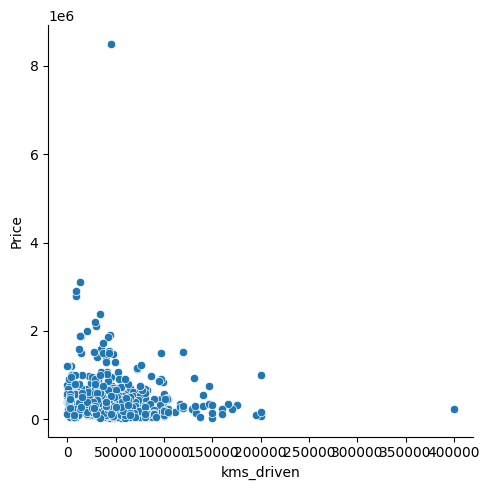

In [188]:
sns.relplot(kind = 'scatter', data = df, x = 'kms_driven', y = 'Price')

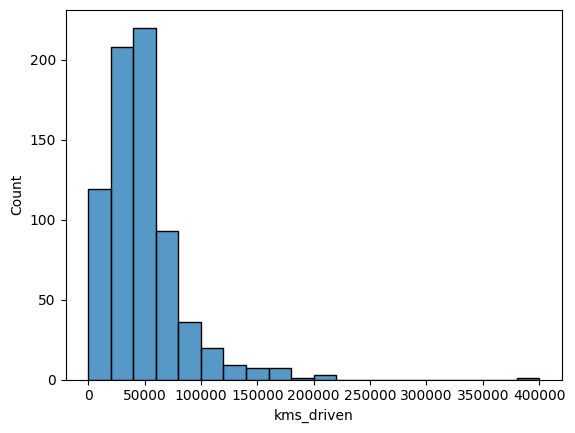

In [189]:
sns.histplot(data = df, x = 'kms_driven', bins = 20)
plt.show()

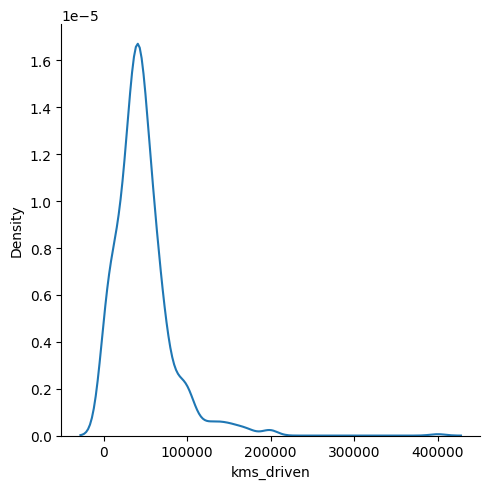

In [190]:
sns.displot(kind = 'kde', data = df, x = 'kms_driven')
plt.show()

In [191]:
df['kms_driven'].skew()

2.7178342451502857

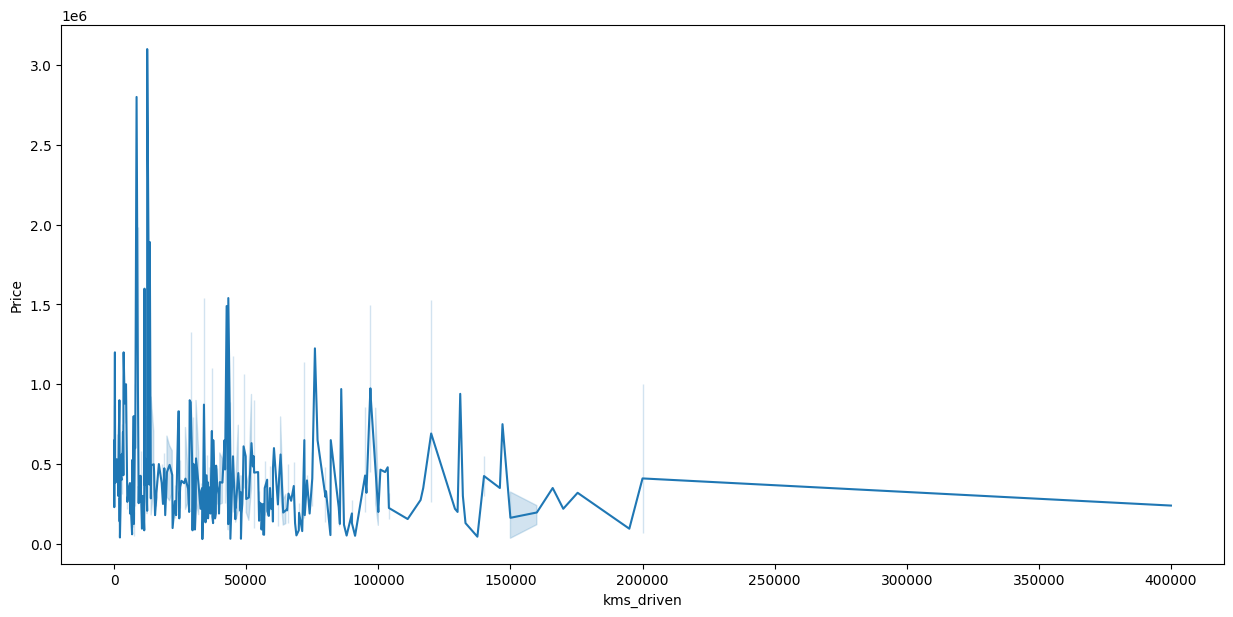

In [192]:
plt.figure(figsize = (15,7))
sns.lineplot(data = df, x = 'kms_driven', y = 'Price')
plt.show()

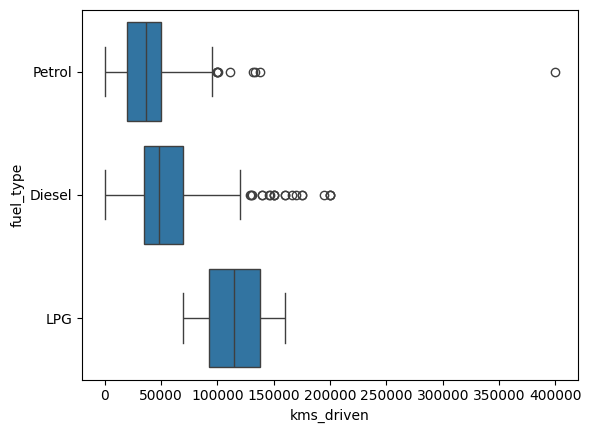

In [193]:
sns.boxplot(data = df, x = 'kms_driven', y = 'fuel_type')
plt.show()

# Feature Engineering

**The data of "kms_driven" is skewed and there are many outliers.**

In [194]:
# Handing Outliers

percentile25 = df['kms_driven'].quantile(0.25)
percentile75 = df['kms_driven'].quantile(0.75)

iqr = percentile75 - percentile25

upper_boundary = percentile75 + 1.5 * iqr
lower_boundary = percentile25 - 1.5 * iqr

In [195]:
# Detecting outliers

df[(df['kms_driven'] > upper_boundary) | (df['kms_driven'] < lower_boundary)]

,company,year,Price,kms_driven,fuel_type,model
46,Tata,2017,200000,130000,Diesel,Indigo eCS
111,Hindustan,2000,70000,200000,Diesel,Motors Ambassador
149,Tata,2016,320000,175430,Diesel,Indigo eCS
194,Tata,2016,320000,175400,Diesel,Indigo eCS
231,Mahindra,2004,230000,160000,Diesel,Scorpio VLX
238,Mahindra,2007,220000,170000,Diesel,Scorpio 2.6
280,Honda,2010,240000,400000,Petrol,City 1.5
289,Maruti,2016,350000,166000,Diesel,Suzuki Swift
327,Maruti,2015,220000,129000,Diesel,Suzuki Swift
331,Toyota,2010,940000,131000,Diesel,Fortuner 3.0


In [196]:
# Capping

df['kms_driven'] = np.where(
    df['kms_driven'] > upper_boundary,
    upper_boundary,
    np.where(
        df['kms_driven'] < lower_boundary,
        lower_boundary,
        df['kms_driven']
    )
)

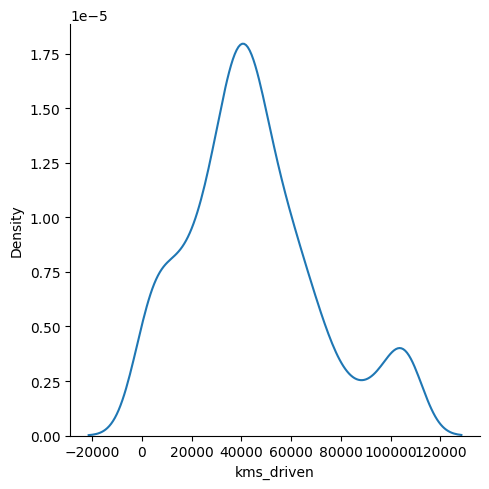

In [197]:
sns.displot(kind = 'kde', data = df, x = 'kms_driven')
plt.show()

In [198]:
df['kms_driven'].skew()

0.5919754166426755

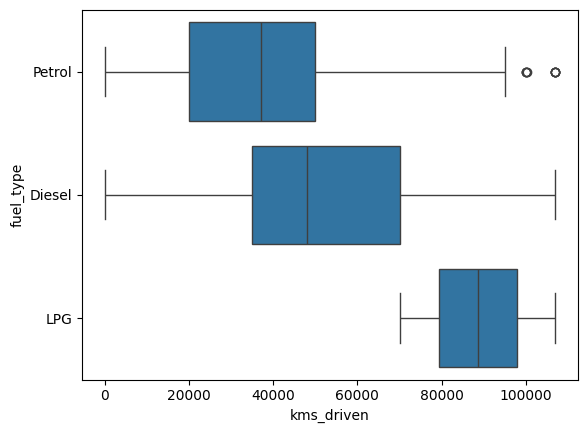

In [199]:
sns.boxplot(data = df, x = 'kms_driven', y = 'fuel_type')
plt.show()

# Modeling

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [201]:
X = df.drop(columns = ['Price'])
Y = df['Price']

In [202]:
X

,company,year,kms_driven,fuel_type,model
0,Hyundai,2007,45000.0,Petrol,Santro Xing
1,Mahindra,2006,40.0,Diesel,Jeep CL550
2,Hyundai,2014,28000.0,Petrol,Grand i10
3,Ford,2014,36000.0,Diesel,EcoSport Titanium
4,Ford,2012,41000.0,Diesel,Figo
...,...,...,...,...,...
719,Maruti,2011,50000.0,Petrol,Suzuki Ritz
720,Tata,2009,30000.0,Diesel,Indica V2
721,Toyota,2009,107000.0,Petrol,Corolla Altis
722,Tata,2018,27000.0,Diesel,Zest XM


In [203]:
Y

,Price
0,80000
1,425000
2,325000
3,575000
4,175000
...,...
719,270000
720,110000
721,300000
722,260000


In [204]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [205]:
x_test.shape

(145, 5)

In [206]:
# one hot encoding

ct1 = ColumnTransformer([('ohe_company_fueltype', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), [0, 3, 4])],
                        remainder = 'passthrough')

In [207]:
lr = LinearRegression()

In [208]:
# Pipelining

pipe = Pipeline([
    ('action1', ct1),
    ('action2', lr)
])

In [209]:
# Fitting the model

pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('action1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_company_fueltype',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 3, 4])])),
                ('action2', LinearRegression())])

In [210]:
y_pred = pipe.predict(x_test)
y_pred

array([ 251886.02737279,  295873.21452627,  308624.33296543,
        196920.8554713 ,   60159.19439702,  508293.88369622,
        240442.93938039,  564821.31784412,  208155.56893115,
         92352.3722441 ,  404272.32360403,  206845.20432245,
        307318.00919236,  672186.33717472,  283741.27238106,
        515752.03199792,  478217.33309047,  561701.42033171,
        226355.99699219,  580214.58400539,  167694.87872145,
        494231.19980294,  361967.87921668,  298371.05117644,
        560764.67113172,  483991.35498787,  244963.51454095,
        215576.54188128,  573787.74945599,  268686.29435648,
        140067.80845822, 1877152.63474052,  531525.77276284,
        599756.05236439,  213445.25018702,  527667.00972829,
         75146.39505988,  180779.78619708,  370907.61956494,
         26069.99752586,  209496.97850024,  639977.18473852,
        531323.59894043,  231987.02606969,  220792.88675143,
        185443.82778375,  431815.79924899,  421415.28703908,
        127572.50779112,

In [211]:
# R2 Score

r2_score(y_test, y_pred)

0.08505509576827697

## Finding the best random state

In [212]:
scores = []

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(ct1, lr)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [213]:
# Index of heighest score

best_random_state = np.argmax(scores)
best_random_state

326

In [214]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = best_random_state)

lr = LinearRegression()
pipe = make_pipeline(ct1, lr)

pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_company_fueltype',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 3, 4])])),
                ('linearregression', LinearRegression())])

In [215]:
y_pred = pipe.predict(x_test)

r2_score(y_test, y_pred)

0.8546379324229522

# Now test for new input

In [223]:
test_input = np.array(['BMW', 2019, 100, 'Petrol', 'Maruti Suzuki Swift'], dtype=object).reshape(1,5)

In [224]:
test_input

array([['BMW', 2019, 100, 'Petrol', 'Maruti Suzuki Swift']], dtype=object)

In [228]:
print('Predicted price is:', int(pipe.predict(test_input)[0]))

Predicted price is: 1186735


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
